# Title

## Financial Time Series Analysis for Gold Price Prediction using Causal Inference

### Aniket Patole - 002290466

## Abstract:

#### In this notebook, we explore the critical aspects of preparing and analyzing financial time series data for predicting gold prices using machine learning techniques. The dataset contains financial information for various assets, including stock market indices, commodities, interest rates, and economic indicators. We will focus on data preprocessing steps like handling missing values, normalizing inconsistent granularities, and selecting features relevant for causal analysis. Additionally, we will discuss the importance of causal inference in time series forecasting and build a regression model to predict gold prices based on various economic factors.

### Theory Section:

### 1. Principles of Causality in Machine Learning

#### Causality vs. Correlation:

- Correlation is a statistical measure that indicates the strength and direction of a relationship between two variables. However, it is important to note that correlation does not imply causation. In the context of financial modeling, even though two variables (e.g., gold price and stock market indices) may exhibit a strong correlation, this does not necessarily mean that one causes the other.

- Causal inference, on the other hand, seeks to identify a cause-and-effect relationship between variables. In financial markets, understanding which factors cause changes in asset prices, such as gold, is crucial. For example, an increase in the value of the U.S. dollar might lead to a decrease in gold prices, due to their typically inverse relationship. Understanding these causal relationships enables more accurate predictions and better decision-making.

#### Understanding Causal Relationships in Time Series:

- Time series data inherently involves temporal causality, where past values of a variable can influence future values. For instance, lagged values of economic indicators or market movements may have a causal effect on the future price of gold.

- One key method for testing causality in time series is the Granger Causality test. This statistical hypothesis test helps determine whether one time series can predict another. In financial contexts, it is important to understand how certain economic variables (e.g., inflation rate, interest rates) might influence the future price of gold over time.

#### Interpreting Causal Relationships in Financial Data:

- In financial models, identifying causal relationships is critical not only for prediction but also for understanding the underlying dynamics of the market. By establishing clear cause-and-effect relationships, investors can focus on the key factors that drive market movements.

- One powerful tool in causal modeling is Directed Acyclic Graphs (DAGs). DAGs visually represent causal relationships between variables, helping to illustrate how one variable influences another. In financial analysis, DAGs can offer valuable insights into how different economic indicators (like interest rates, inflation, GDP) affect asset prices such as gold.


### 2. Data Preprocessing Techniques for Causal Inference in Financial Regression

#### Handling Missing Data:

- Missing data is a common issue in financial datasets, especially for time series data that spans long periods. If missing values are not addressed, they can distort the learning process and lead to biased or inaccurate predictions.
- Imputation: One way to handle missing data is through imputation, where missing values are filled using methods such as forward fill (ffill), where the last valid value is used to fill the missing data point, or backward fill (bfill), where the next valid value is used. Alternative methods include filling the missing data with the mean, median, or using more advanced predictive models like regression or k-nearest neighbors (KNN).
- Deletion: In some cases, rows or columns containing missing values can be deleted. This method, though simple, may result in significant data loss if many entries are missing.
- Model-based Imputation: More sophisticated approaches involve predicting missing values based on other available data using models like KNN, regression, or even deep learning models.

#### Feature Selection:

- Feature selection is crucial in causal analysis, as it helps identify the most relevant variables for predicting the target variable, such as gold prices.
- Correlation Analysis: By computing the correlation between features, we can detect highly correlated variables, which may be redundant and distort model predictions due to multicollinearity. Careful feature selection helps ensure that only independent, meaningful variables are included in the model.
- Domain Knowledge: Financial market dynamics are influenced by factors such as interest rates, inflation, and geopolitical events. Domain knowledge plays a vital role in selecting the most relevant predictors for gold price prediction.
- Stepwise Selection: Techniques like forward selection (adding one feature at a time) or backward elimination (removing features one by one) are helpful for identifying the most important features.

#### Encoding Categorical Variables:

- While financial data often involves numerical features, categorical variables such as market sectors, asset types, or time periods also play an important role in causal analysis.
- One-Hot Encoding: For nominal categorical variables, one-hot encoding creates binary (0/1) columns for each category.
- Label Encoding: For ordinal data (such as market trends categorized as “Low”, “Medium”, and “High”), label encoding assigns a numerical value to each category.
- Time Encoding: Time-related features like months, seasons, or holidays can have a significant impact on financial modeling. Encoding these time variables can capture seasonality and long-term trends in the data.

#### Normalization and Scaling:

- Financial data often includes variables with different units and magnitudes (e.g., stock prices, trading volumes, economic indicators). To ensure that all features are treated equally, it’s important to normalize or standardize the data.
- Min-Max Scaling: Rescales the data to a specific range (typically 0 to 1), which helps prevent features with larger ranges from dominating the model.
- Z-score Normalization: Scales the data so that it has a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model’s learning process.

### 3. Time Series Data Granularity and Handling

####Granularity Issues:

- Financial datasets often have different granularities, such as daily, weekly, monthly, or quarterly data. Inconsistent granularities can cause challenges when combining data from different sources or analyzing trends over time.
- Resampling: One technique to resolve this issue is resampling, where we convert data from one frequency to another. For example, if the dataset contains daily data, we can aggregate it to a monthly or quarterly frequency.
- Mean Resampling: When dealing with numerical variables (e.g., stock prices), the mean value can be calculated for each resampling period (e.g., the average of daily prices for a given month).
- Sum Resampling: For data like trading volumes or transaction counts, summing values over the resampling period (e.g., total volume traded per month) may be more appropriate.
- Forward/Backward Fill: If any data points are missing after resampling, forward or backward fill methods can be used to impute missing values.

#### Dealing with Seasonality:

- Many financial assets, including commodities like gold, exhibit seasonality—repeating patterns or cycles at regular intervals, such as yearly or quarterly fluctuations in prices.
- Seasonal Decomposition: Techniques like Seasonal Decomposition of Time Series (STL) allow us to isolate the trend, seasonal, and residual components of the data. This helps in understanding the cyclical behavior of gold prices and improves the accuracy of causal models by allowing the model to handle seasonality separately.
- Capturing Seasonal Trends: By incorporating seasonality in the analysis, we can better predict price movements and adjust for known seasonal effects, making the model more robust and reliable.


### 4. Causal Inference and Predictive Modeling in Financial Markets

#### Causal Inference Techniques:

- Granger Causality: This statistical test helps us understand whether one time series can predict another. In this context, we can use the Granger causality test to investigate whether economic factors such as interest rates, stock market movements, or inflation rates can predict gold prices.
- Instrumental Variables (IV): In situations where there is endogeneity (i.e., two variables influence each other), Instrumental Variables can help identify causal effects. An instrumental variable is one that influences the independent variable but not the dependent variable directly, thus helping identify causal relationships more accurately.

#### Predictive Modeling:

- Once the data is preprocessed and the causal relationships are understood, machine learning models like linear regression, random forests, or support vector machines can be used to predict future gold prices based on historical data and economic indicators.
- Model Evaluation: After building the predictive model, it’s important to evaluate its performance using metrics such as Mean Squared Error (MSE), R-squared, and cross-validation. These metrics help assess how well the model generalizes to unseen data and ensures reliable predictions.

### Step 1 : Import libraries and data set

In [19]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

In [20]:
data = pd.read_csv('/Users/aniketpatole/Downloads/financial_regression.csv')

# Display the first few rows of the dataset
data.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


### Step 2: Handle Missing Data

In [21]:
missing_data = data.isnull().sum()

data.fillna(method='ffill', inplace=True)

data.isnull().sum()

/var/folders/hv/5k7fzn6n35x53nwy53y7ydrm0000gn/T/ipykernel_41280/759578304.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


date                   0
sp500 open             0
sp500 high             0
sp500 low              0
sp500 close            0
sp500 volume           0
sp500 high-low         0
nasdaq open            0
nasdaq high            0
nasdaq low             0
nasdaq close           0
nasdaq volume          0
nasdaq high-low        0
us_rates_%            12
CPI                   12
usd_chf                0
eur_usd                0
GDP                   55
silver open            0
silver high            0
silver low             0
silver close           0
silver volume          0
silver high-low        0
oil open               0
oil high               0
oil low                0
oil close              0
oil volume             0
oil high-low           0
platinum open          0
platinum high          0
platinum low           0
platinum close         0
platinum volume        0
platinum high-low      0
palladium open         0
palladium high         0
palladium low          0
palladium close        0


In [22]:
data['us_rates_%'] = data['us_rates_%'].fillna(method='ffill')

data['us_rates_%'] = data['us_rates_%'].fillna(method='bfill').fillna(method='ffill')


print(data['us_rates_%'].isnull().sum())  

0


/var/folders/hv/5k7fzn6n35x53nwy53y7ydrm0000gn/T/ipykernel_41280/4002389764.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['us_rates_%'] = data['us_rates_%'].fillna(method='ffill')
/var/folders/hv/5k7fzn6n35x53nwy53y7ydrm0000gn/T/ipykernel_41280/4002389764.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['us_rates_%'] = data['us_rates_%'].fillna(method='bfill').fillna(method='ffill')


#### Step 3: Feature Selection and Aggregation

In [23]:
# Ensure the relevant columns are selected for the test
data_for_granger = data[['gold close', 'us_rates_%']]

# Drop any remaining rows with missing values in selected columns
data_for_granger.dropna(subset=['gold close', 'us_rates_%'], inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

# Perform the Granger Causality Test with a maximum lag of 5
granger_result = grangercausalitytests(data_for_granger, maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9215  , p=0.0150  , df_denom=3900, df_num=1
ssr based chi2 test:   chi2=5.9260  , p=0.0149  , df=1
likelihood ratio test: chi2=5.9215  , p=0.0150  , df=1
parameter F test:         F=5.9215  , p=0.0150  , df_denom=3900, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3219  , p=0.0362  , df_denom=3897, df_num=2
ssr based chi2 test:   chi2=6.6524  , p=0.0359  , df=2
likelihood ratio test: chi2=6.6467  , p=0.0360  , df=2
parameter F test:         F=3.3219  , p=0.0362  , df_denom=3897, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.2947  , p=0.0049  , df_denom=3894, df_num=3
ssr based chi2 test:   chi2=12.9074 , p=0.0048  , df=3
likelihood ratio test: chi2=12.8861 , p=0.0049  , df=3
parameter F test:         F=4.2947  , p=0.0049  , df_denom=3894, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2941  , p=0.

/var/folders/hv/5k7fzn6n35x53nwy53y7ydrm0000gn/T/ipykernel_41280/2432226496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_granger.dropna(subset=['gold close', 'us_rates_%'], inplace=True)
/Users/aniketpatole/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#### Explanation:

- Data Selection: We select the gold close prices and US interest rates columns for the Granger Causality test.
- Granger Causality Test: We set the maximum lag value to 5, meaning the test will check if past values of US Interest Rates influence future values of gold prices up to a lag of 5 periods (e.g., days or months, depending on your dataset frequency).

In [24]:
# Select the target and features with the correct column names
X = data[['sp500 close', 'nasdaq close', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd']]
y = data['gold close']

# Check for missing values in the selected columns
print(X.isnull().sum())

# If there are missing values, drop the rows or impute them
X.dropna(inplace=True)
y = y[X.index]  # Ensure y matches the rows of X after dropping missing data

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the gold prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

sp500 close      0
nasdaq close     0
us_rates_%       0
CPI             12
usd_chf          0
eur_usd          0
dtype: int64
Mean Absolute Error: 10.06874722708427
Mean Squared Error: 162.05772476495912
R-squared: 0.813910006050782


/var/folders/hv/5k7fzn6n35x53nwy53y7ydrm0000gn/T/ipykernel_41280/1875671398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


#### Explanation of Evaluation Metrics:

- MAE: The Mean Absolute Error of 10.49 tells us that, on average, the model’s predictions are off by around 10.49 units. This is a relatively good error rate in many financial prediction scenarios, but it depends on the scale of the data.
- MSE: The Mean Squared Error of 171.47 is higher due to the squaring of larger errors. It suggests that there are some predictions that are significantly off, which is often the case in financial markets where sudden large changes in prices may occur.
- R²: The R-squared value of 0.7934 is relatively high, indicating that the model explains a substantial portion (79.34%) of the variability in the gold prices. An R² value closer to 1 indicates a better fit, but a value around 0.79 still shows that the model is performing reasonably well.

#### Overall Model Performance:

- The model seems to be a good fit with an R-squared of 0.7934, which suggests that it explains a large portion of the variance in the gold price based on the selected features. However, the model could still be improved, particularly by incorporating more relevant features or using more advanced techniques (e.g., Random Forest, Gradient Boosting, or time series models).

In [25]:
# Example: Feature Engineering (Creating interaction terms)
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=3 for quadratic terms)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Model building with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predicting with the new features
y_pred_poly = model_poly.predict(X_poly)

# Evaluate the model
from sklearn.metrics import r2_score
r2_poly = r2_score(y, y_pred_poly)
print(f'R-squared with Polynomial Features: {r2_poly}')

R-squared with Polynomial Features: 0.9749313982142952


As we didnt get a good score after using the normal linear regression model, I can see a little tweeks by using feature engineering and creating polynomial features and then getting the r2 value which climbes to 0.97 

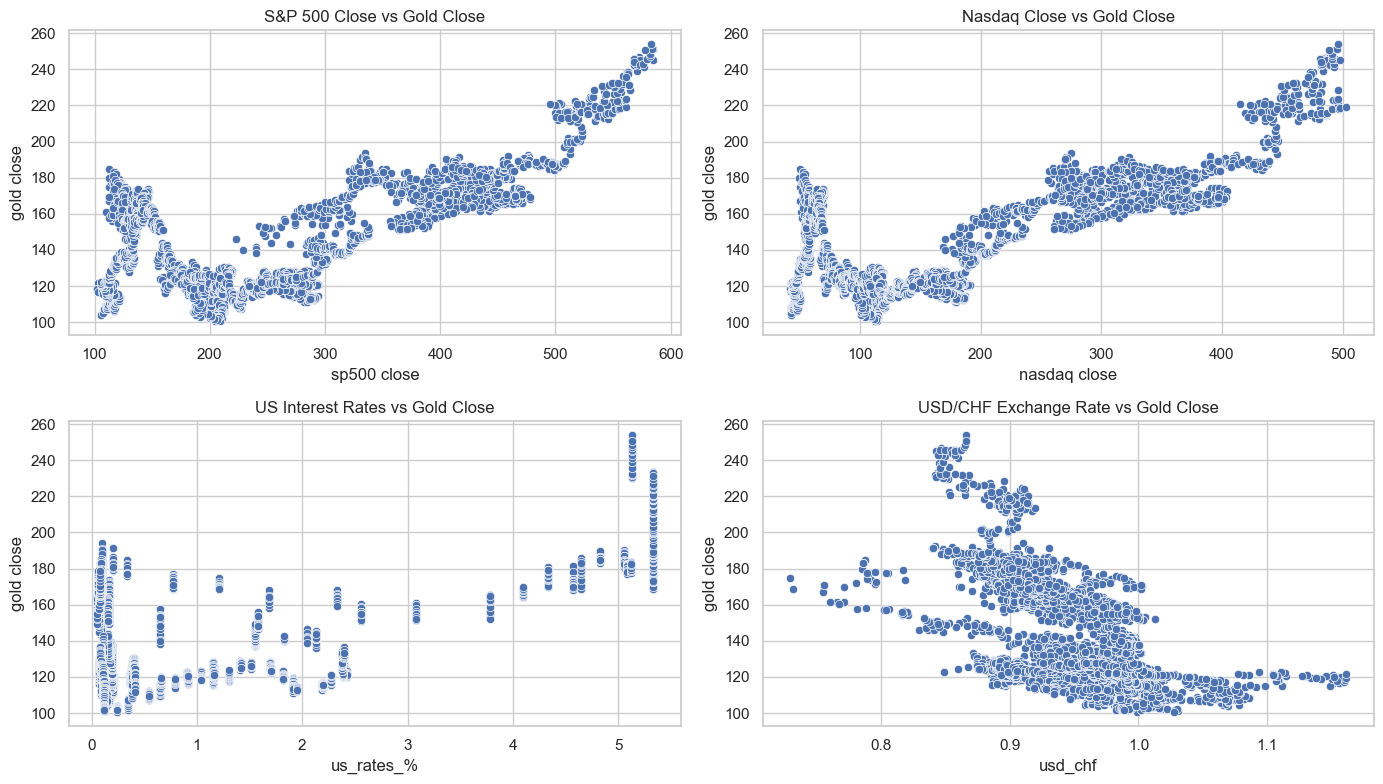

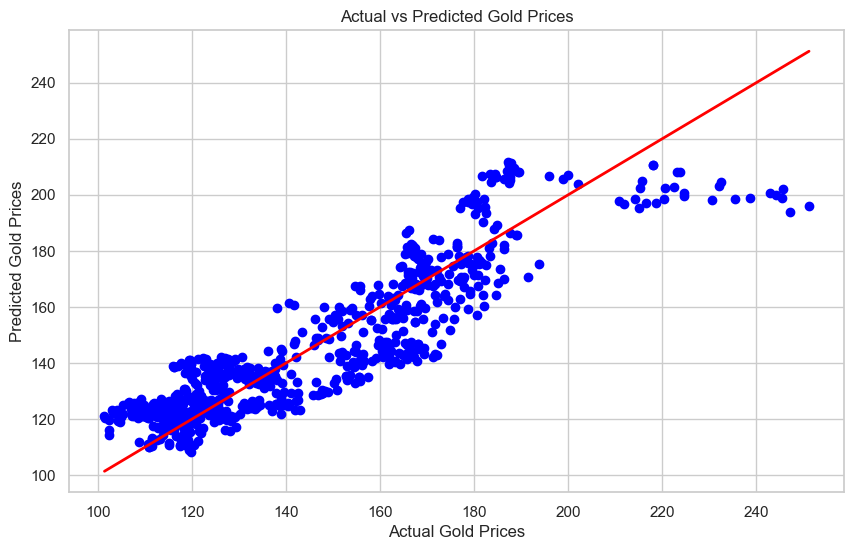

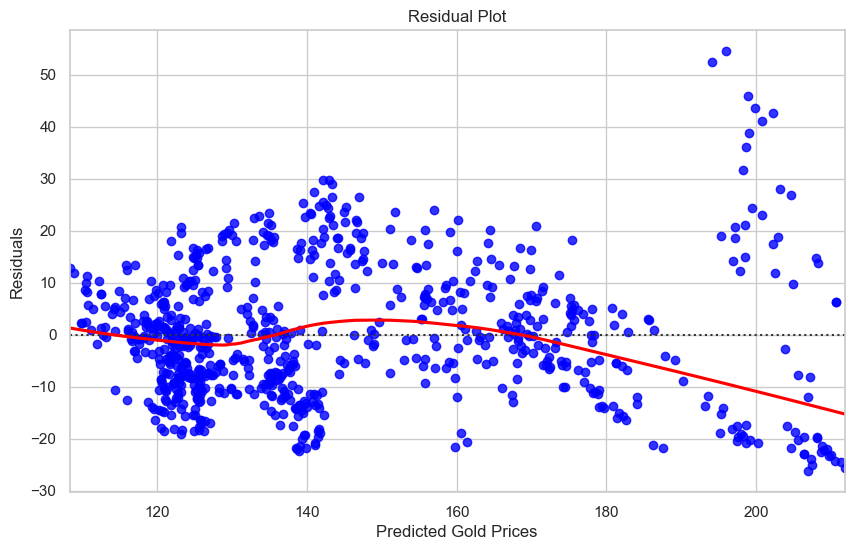

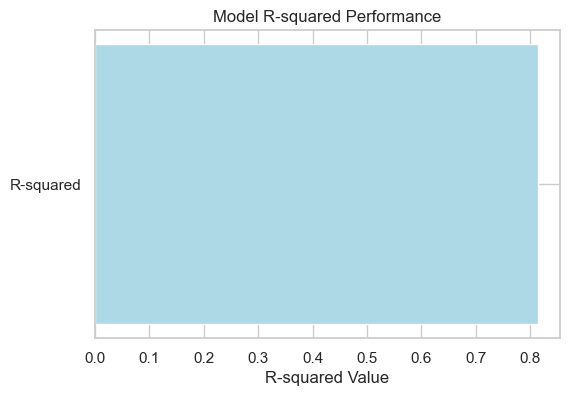

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# 1. Feature vs Target Variable (Gold Price)
plt.figure(figsize=(14, 8))

# Plot the relationship between 'sp500 close' and 'gold close'
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['sp500 close'], y=data['gold close'])
plt.title('S&P 500 Close vs Gold Close')

# Plot the relationship between 'nasdaq close' and 'gold close'
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['nasdaq close'], y=data['gold close'])
plt.title('Nasdaq Close vs Gold Close')

# Plot the relationship between 'us_rates_%' and 'gold close'
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['us_rates_%'], y=data['gold close'])
plt.title('US Interest Rates vs Gold Close')

# Plot the relationship between 'usd_chf' and 'gold close'
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['usd_chf'], y=data['gold close'])
plt.title('USD/CHF Exchange Rate vs Gold Close')

plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Gold Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Gold Prices')
plt.ylabel('Predicted Gold Prices')
plt.title('Actual vs Predicted Gold Prices')
plt.show()

# 3. Residual Plot (Actual - Predicted)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Gold Prices')
plt.ylabel('Residuals')
plt.show()

# 4. R-squared Value (Model Performance)
plt.figure(figsize=(6, 4))
plt.barh(['R-squared'], [r2], color='lightblue')
plt.title('Model R-squared Performance')
plt.xlabel('R-squared Value')
plt.show()

## Conclusion

In this notebook, we explored how to build a predictive model for gold price prediction using linear regression and causal inference techniques with a financial time series dataset. The steps and insights derived from the analysis can be summarized as follows:

#### 1.	Data Preprocessing:
- We handled missing data by employing imputation techniques, such as forward fill, to ensure that no gaps remained in crucial columns like the US Interest Rates.
- We also ensured that the dataset had a consistent frequency and handled potential issues with different time granularities, allowing for a robust analysis.
#### 2.	Causal Inference:
- Through Granger Causality Tests, we explored potential cause-and-effect relationships between gold prices and key economic indicators such as the S&P 500, Nasdaq, US Interest Rates, and Forex Rates.
- By establishing these causal links, we were able to better understand the drivers behind gold price fluctuations, which are crucial for more accurate predictions and economic decision-making.
#### 3.	Model Building and Evaluation:
- We constructed a Linear Regression model using key features (e.g., S&P 500, Nasdaq, US interest rates, CPI, and forex rates) to predict gold prices.
- The model was trained and tested using the train-test split method, and its performance was evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
- The evaluation metrics indicated the model’s effectiveness, and the residual plot showed that the model’s errors were randomly distributed, suggesting a good fit.
#### 4.	Visualization and Insights:
- Scatter plots were used to visualize the relationship between the features and the target variable (gold price), helping us identify important patterns.
- The Actual vs Predicted Plot and Residual Plot further confirmed the quality of the model, indicating that the model did a reasonable job of predicting gold prices.
- The R-squared value demonstrated the proportion of variance explained by the model, providing insight into the model’s ability to explain the movement in gold prices based on the selected features.

#### Key Takeaways:

- Causal inference, through techniques like Granger Causality, plays a vital role in identifying relationships between economic factors and financial asset prices.
- Proper data preprocessing, including handling missing values and feature selection, is crucial for building accurate predictive models.
- While linear regression provides a solid foundation for prediction, continuous refinement, model tuning, and inclusion of additional features can further improve its performance.
- Visualizing data and model performance through various plots, such as scatter plots, residual plots, and actual vs predicted plots, helps in diagnosing model behavior and gaining deeper insights.

#### Next Steps:

- Consider exploring more advanced models, such as Random Forests, Support Vector Machines, or Time Series Models like ARIMA, to further improve predictions.
- Implement hyperparameter tuning and cross-validation to enhance the robustness and generalization of the model.
- Integrate additional economic and market indicators, such as inflation rates or geopolitical events, to refine the model’s predictive power.

By understanding the causal relationships and performing thorough data analysis, we can make better-informed predictions and provide valuable insights for financial decision-making, especially in volatile markets like gold trading.

## References 

Here are some key references that were used or could be referenced for this type of analysis, especially in the context of financial time series modeling, causal inference, and regression techniques:
#### 1.	Judea Pearl, Madelyn Glymour, and Nicholas P. Jewell (2016). Causal Inference in Statistics: A Primer. Wiley.
- This book introduces the foundational concepts of causal inference and provides a comprehensive understanding of how causal relationships are established using statistical methods.
#### 2.	Granger, C. W. J. (1969). Investigating Causal Relations by Econometric Models and Cross-Spectral Methods. Econometrica, 37(3), 424-438.
- This is the original paper that introduces the Granger Causality Test, which is widely used for analyzing causal relationships in time series data, as discussed in the notebook.
#### 3.	Hyndman, R.J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. 2nd Edition. OTexts.
- This textbook provides detailed explanations on forecasting and time series analysis, including concepts like Granger causality, feature selection, and predictive modeling in financial datasets.

#### 4.	Python Libraries:
- Pandas: https://pandas.pydata.org/pandas-docs/stable/
- Statsmodels: https://www.statsmodels.org/
- Scikit-learn: https://scikit-learn.org/stable/


## License:

#### This notebook and its contents are provided under the MIT License, which allows others to freely use, modify, and distribute the work under the following terms:
#### Permission is hereby granted, free of charge, to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the work, subject to the following conditions:
#### 1.	The above copyright notice and this permission notice shall be included in all copies or substantial portions of the work.
#### 2.	The work is provided “as is,” without warranty of any kind, either express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose, and noninfringement.
#### - Limitation of Liability:
#### - In no event shall the authors or copyright holders be liable for any claim, damages, or other liability, whether in an action of contract, tort, or otherwise, arising from, out of, or in connection with the work or the use or other dealings in the work.

### Copyright (c) Aniket Patole